<a href="https://colab.research.google.com/github/xunzxe/first-repository/blob/master/Python_quest/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###결측치 판단 및 처리
-  결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.

In [19]:
import pandas as pd
trip_df = pd.read_csv('trip.csv')

In [20]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [21]:
trip_df.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [22]:
trip_df['fare_amount'].dropna()

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22698, dtype: float64

###이상치 판단 및 처리
-  숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거합니다.


In [23]:
import seaborn as sns

In [37]:
#'passenger_count' 이상치 제거
trip_df['passenger_count']=trip_df['passenger_count'][trip_df['passenger_count']<30]

<Axes: xlabel='None', ylabel='passenger_count'>

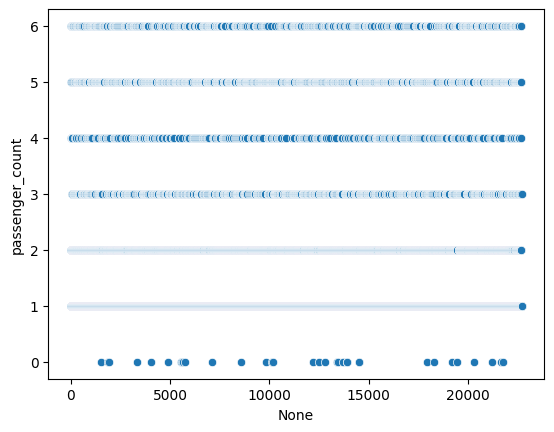

In [38]:
sns.scatterplot(x=trip_df.index, y=trip_df['passenger_count'])

<Axes: xlabel='None', ylabel='trip_distance'>

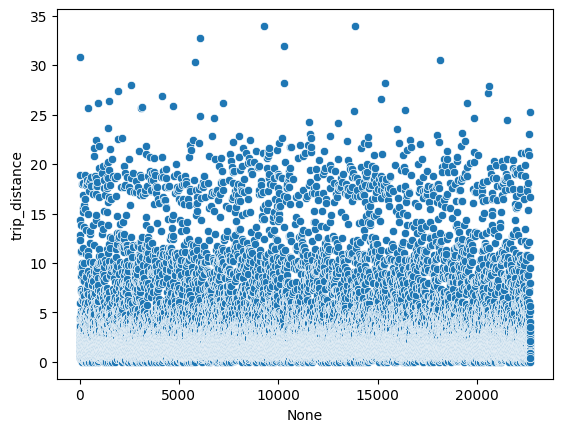

In [28]:
sns.scatterplot(x=trip_df.index, y=trip_df['trip_distance'])

In [46]:
#'fare_amount' 이상치 제거
trip_df['fare_amount']=trip_df['fare_amount'][trip_df['fare_amount']<400]
trip_df['fare_amount']=trip_df['fare_amount'][trip_df['fare_amount']>-1]

<Axes: xlabel='None', ylabel='fare_amount'>

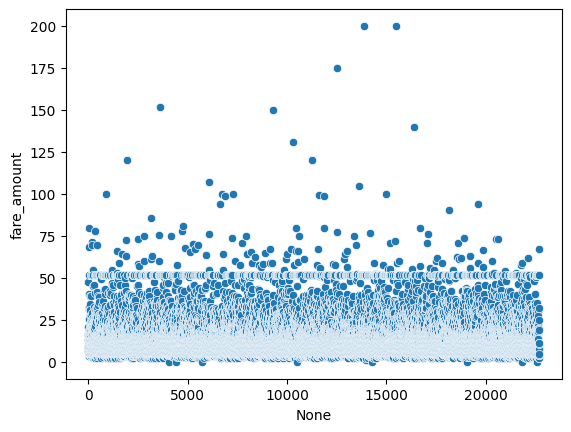

In [47]:
sns.scatterplot(x=trip_df.index, y=trip_df['fare_amount'])

In [49]:
#'tip_amount' 이상치 제거
trip_df['tip_amount']=trip_df['tip_amount'][trip_df['tip_amount']<200]

<Axes: xlabel='None', ylabel='tip_amount'>

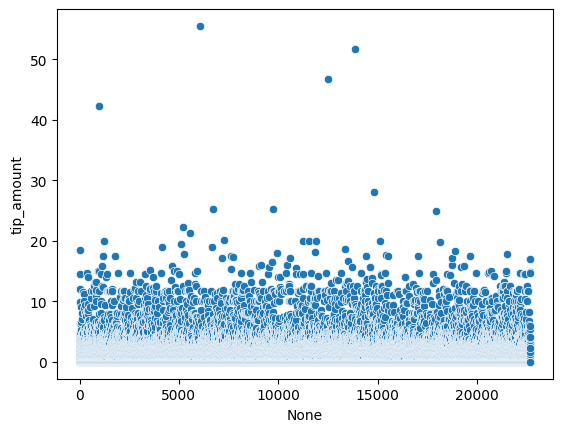

In [50]:
sns.scatterplot(x=trip_df.index, y=trip_df['tip_amount'])

<Axes: xlabel='None', ylabel='tolls_amount'>

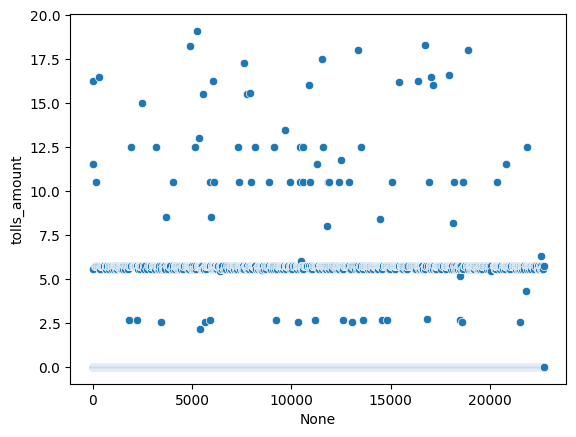

In [51]:
sns.scatterplot(x=trip_df.index, y=trip_df['tolls_amount'])


###택시 탑승 및 하차 시간 활용
- 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?


In [56]:
trip_float = trip_df.drop(['passenger_name','tpep_pickup_datetime','tpep_dropoff_datetime','payment_method'],axis=1)
trip_float.corr()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
passenger_count,1.000000,0.016599,0.013842,-0.009419,0.009577
trip_distance,0.016599,1.000000,0.903792,0.569173,0.622848
fare_amount,0.013842,0.903792,1.000000,0.603728,0.614271
tip_amount,-0.009419,0.569173,0.603728,1.000000,0.479153
tolls_amount,0.009577,0.622848,0.614271,0.479153,1.000000



###Credit Card와 Debit Card를 구분없이 "Card"라는 이름 생성

In [59]:
trip_df['payment_method'].replace('Credit Card','Card')
trip_df['payment_method'].replace('Debit Card','Card')

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_method, Length: 22701, dtype: object